<a href="https://colab.research.google.com/github/lovishdany/RL__NCU/blob/main/Lab-3__Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BanditProblem:
    def __init__(self, trueActionValues, epsilon, totalSteps):
        self.armNumber = np.size(trueActionValues)
        self.epsilon = epsilon
        self.currentStep = 0
        self.numberOfTimesArmSelected = np.zeros(self.armNumber)
        self.totalSteps = totalSteps
        self.trueActionValues = trueActionValues
        self.armMeanRewards = np.zeros(self.armNumber)
        self.currentReward = 0
        self.meanReward = np.zeros(totalSteps+1)

    def epsilonGreedySelectActions(self):
        probabiltyDraw = np.random.rand()
        if (self.currentStep==0) or (probabiltyDraw<=self.epsilon):
            selectedArmIndex = np.random.choice(self.armNumber)
        if (probabiltyDraw>self.epsilon):
            selectedArmIndex = np.argmax(self.armMeanRewards)
        self.currentStep+=1
        self.numberOfTimesArmSelected[selectedArmIndex] = self.numberOfTimesArmSelected[selectedArmIndex] + 1
        self.currentReward = np.random.normal(self.trueActionValues[selectedArmIndex],2)
        self.meanReward[self.currentStep] = self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])
        self.armMeanRewards[selectedArmIndex]=self.armMeanRewards[selectedArmIndex]+(1/(self.numberOfTimesArmSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])


    def greedySelectActions(self):
        probabiltyDraw = np.random.rand()
        if (self.currentStep==0) or (probabiltyDraw<=0):
            selectedArmIndex = np.random.choice(self.armNumber)
        if (probabiltyDraw>0):
            selectedArmIndex = np.argmax(self.armMeanRewards)
        self.currentStep+=1
        self.numberOfTimesArmSelected[selectedArmIndex] = self.numberOfTimesArmSelected[selectedArmIndex] + 1
        self.currentReward = np.random.normal(self.trueActionValues[selectedArmIndex],2)
        self.meanReward[self.currentStep] = self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])
        self.armMeanRewards[selectedArmIndex]=self.armMeanRewards[selectedArmIndex]+(1/(self.numberOfTimesArmSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])

    def greedyplayGame(self):
        for i in range(self.totalSteps):
            self.greedySelectActions()
        print(self.numberOfTimesArmSelected)
    def epsilonplayGame(self):
        for i in range(self.totalSteps):
            self.epsilonGreedySelectActions()
        print(self.numberOfTimesArmSelected)


[  8.  43.  14.  21. 889.  12.  13.]
[  2. 998.   0.   0.   0.   0.   0.]


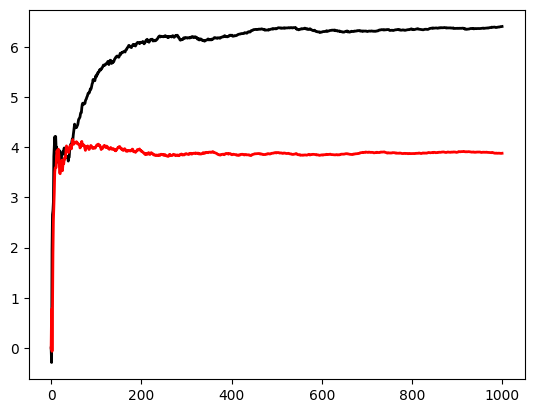

In [3]:
epsilon=0.1
totalSteps=1000
actionValues=np.array([1,4,2,0,7,1,-1])
Bandit1=BanditProblem(actionValues, epsilon, totalSteps)
Bandit1.epsilonplayGame()
Bandit2=BanditProblem(actionValues, 0, totalSteps)
Bandit2.greedyplayGame()
GreedyMeanReward = Bandit2.meanReward
MeanReward=Bandit1.meanReward
plt.plot(np.arange(totalSteps+1),MeanReward,linewidth=2, color='k', label='epsilon =0.1')
plt.plot(np.arange(totalSteps+1),GreedyMeanReward,linewidth=2, color='r', label='greedy')
plt.show()